<a href="https://colab.research.google.com/github/ravichas/bioinformatics/blob/main/C11/C11_5_MicroarrayShortVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microarray Analysis

In [ ]:
# High-throughput Experiment

if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis



ERROR: Error in library(rafalib): there is no package called ‘rafalib’


In [ ]:
install.packages("rafalib")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(devtools)
library(rafalib)


Attaching package: ‘rafalib’


The following object is masked from ‘package:devtools’:

    install_bioc




ERROR: Error in library(geneplotter): there is no package called ‘geneplotter’


## 7 minutes; Time Consuming

In [ ]:
BiocManager::install("geneplotter")
library(geneplotter)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing package(s) 'BiocVersion', 'geneplotter'

also installing the dependencies ‘bitops’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘GenomeInfoDb’, ‘plogr’, ‘png’, ‘Biostrings’, ‘XML’, ‘xtable’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘Biobase’, ‘BiocGenerics’, ‘annotate’, ‘AnnotationDbi’


Old packages: 'bit', 'bslib', 'callr', 'curl', 'data.table', 'DBI', 'dbplyr',
  'devtools', 'digest', 'gargle', 'ggplot2', 'gh', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'systemfonts',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun', 'zip',
  'codetools', 'lattice', 'nlme'

L

In [ ]:
# Example1: Let us explore a sample Expression Set data

library(Biobase)
# class??
class(4)
class(pi); pi
# Other way to get help
# ?ExpressionSet  # use tab to get more help
# ?"ExpressionSet"
data(sample.ExpressionSet)
sample.ExpressionSet
head(exprs(sample.ExpressionSet))

# Help in Bioconductor
# vignette("ExpressionSetIntroduction")
# vignette(package="Biobase")
# HTML Help
# browseVignettes(package="Biobase")
# help.start()



[1] "numeric"

[1] "numeric"

[1] 3.141593

ExpressionSet (storageMode: lockedEnvironment)
assayData: 500 features, 26 samples 
  element names: exprs, se.exprs 
protocolData: none
phenoData
  sampleNames: A B ... Z (26 total)
  varLabels: sex type score
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu95av2 

,A,B,C,D,E,F,G,H,I,J,⋯,Q,R,S,T,U,V,W,X,Y,Z
AFFX-MurIL2_at,192.7420,85.75330,176.7570,135.5750,64.49390,76.3569,160.5050,65.9631,56.9039,135.60800,⋯,179.8450,152.4670,180.83400,85.4146,157.98900,146.8000,93.8829,103.85500,64.4340,175.61500
AFFX-MurIL10_at,97.1370,126.19600,77.9216,93.3713,24.39860,85.5088,98.9086,81.6932,97.8015,90.48380,⋯,87.6806,108.0320,134.26300,91.4031,-8.68811,85.0212,79.2998,71.65520,64.2369,78.70680
AFFX-MurIL4_at,45.8192,8.83135,33.0632,28.7072,5.94492,28.2925,30.9694,14.7923,14.2399,34.48740,⋯,32.7911,33.5292,19.81720,20.4190,26.87200,31.1488,22.3420,19.01350,12.1686,17.37800
AFFX-MurFAS_at,22.5445,3.60093,14.6883,12.3397,36.86630,11.2568,23.0034,16.2134,12.0375,4.54978,⋯,15.9488,14.6753,-7.91911,12.8875,11.91860,12.8324,11.1390,7.55564,19.9849,8.96849
AFFX-BioB-5_at,96.7875,30.43800,46.1271,70.9319,56.17440,42.6756,86.5156,30.7927,19.7183,46.35200,⋯,58.6239,114.0620,93.44020,22.5168,48.64620,90.2215,42.0053,57.57380,44.8216,61.70440
AFFX-BioB-M_at,89.0730,25.84610,57.2033,69.9766,49.58220,26.1262,75.0083,42.3352,41.1207,91.53070,⋯,58.1331,104.1220,115.83100,58.1224,73.42210,64.6066,40.3068,41.82090,46.1087,49.41220



## MICROARRAY DATA

# HIGH-THROUGHPUT EXPERIMENT
How Bioconductor works? Example1 (based on Dr. Izarry/Mike Love'snotes)

High-throughput technologies
features could be genes, locations of genome (single base) genomic regions etc

Samples (not related to statistical term, derived from population)
* Samples are also called Experimental units
* Samples could be from diff. parts of a tumor

In [ ]:
library(devtools)
install_github("genomicsclass/GSE5859Subset")
library(GSE5859Subset)
library(Biobase)
library(rafalib)
mypar(1,1)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpeEbJQF/remotesc941faee23/genomicsclass-GSE5859Subset-8ada5f4/DESCRIPTION’ ... OK
* preparing ‘GSE5859Subset’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* creating default NAMESPACE file
* building ‘GSE5859Subset_1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
.oldls = ls()
data(GSE5859Subset)
.newls = ls()
newstuff = setdiff(.newls, .oldls)
cls <- sapply( newstuff,function(x){class(get(x))})
cls
dim(geneExpression) # 8793 x 24

$geneAnnotation
[1] "data.frame"

$geneExpression
[1] "matrix" "array" 

$sampleInfo
[1] "data.frame"

[1] 8793   24

What are the experimental units?
In this case 24 is the experimental unit 24 samples of blood

How many features?
8793 genes dervied from blood

What is the experimental type?
Gene expression measurement experiment
GSE5859 full data set was derived for testing expression pattern for differnt ethnic groups

GSE5859Subset was restricted just one ethnic group but divided into two subgroups


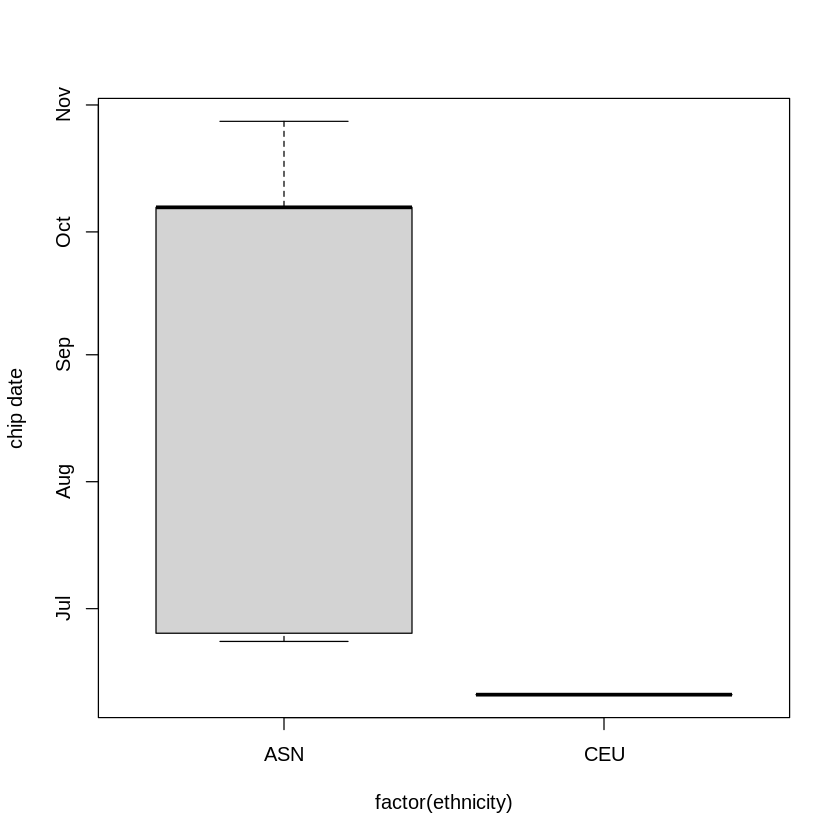

In [ ]:
boxplot(date~factor(ethnicity), data=sampleInfo, ylab="chip date")




In [ ]:
# to find information about the gene BRCA2

all.equal(colnames(geneExpression), sampleInfo$filename)
all.equal(rownames(geneExpression), geneAnnotation$PROBEID)

[1] TRUE

[1] TRUE

In [ ]:
# explore sapleInfo
head(sampleInfo)
g <- sampleInfo$group
g



,ethnicity,date,filename,group
,<fct>,<date>,<chr>,<dbl>
107,ASN,2005-06-23,GSM136508.CEL.gz,1
122,ASN,2005-06-27,GSM136530.CEL.gz,1
113,ASN,2005-06-27,GSM136517.CEL.gz,1
163,ASN,2005-10-28,GSM136576.CEL.gz,1
153,ASN,2005-10-07,GSM136566.CEL.gz,1
161,ASN,2005-10-07,GSM136574.CEL.gz,1


[1] 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# explore geneAnnotation
head(geneAnnotation)

,PROBEID,CHR,CHRLOC,SYMBOL
,<chr>,<chr>,<int>,<chr>
1,1007_s_at,chr6,30852327,DDR1
30,1053_at,chr7,-73645832,RFC2
31,117_at,chr1,161494036,HSPA6
32,121_at,chr2,-113973574,PAX8
33,1255_g_at,chr6,42123144,GUCA1A
34,1294_at,chr3,-49842638,UBA7


In [ ]:
#Method 1 (convoluted)
geneExpression[grep("BRCA2",geneAnnotation$SYMBOL),]

GSM136508.CEL.gz GSM136530.CEL.gz GSM136517.CEL.gz GSM136576.CEL.gz 
        4.529842         4.408719         4.299373         3.797213 
GSM136566.CEL.gz GSM136574.CEL.gz GSM136575.CEL.gz GSM136569.CEL.gz 
        4.626319         4.036313         4.346729         4.486074 
GSM136568.CEL.gz GSM136559.CEL.gz GSM136565.CEL.gz GSM136573.CEL.gz 
        4.200499         4.065917         4.656047         4.027387 
GSM136523.CEL.gz GSM136509.CEL.gz GSM136727.CEL.gz GSM136510.CEL.gz 
        4.550737         4.452210         4.270861         4.649485 
GSM136515.CEL.gz GSM136522.CEL.gz GSM136507.CEL.gz GSM136524.CEL.gz 
        4.198587         4.467732         4.339942         4.463822 
GSM136514.CEL.gz GSM136563.CEL.gz GSM136564.CEL.gz GSM136572.CEL.gz 
        4.308819         4.503945         3.976291         4.247154

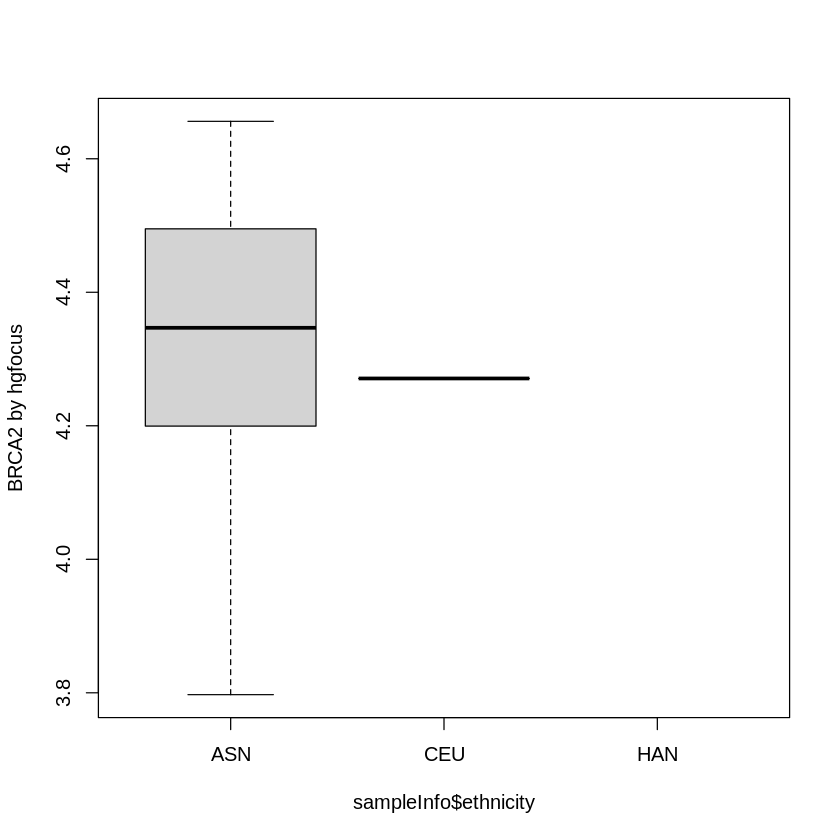

In [ ]:
# Method 2 (Taken From Dr. Mike Love's notes)
ind = which(geneAnnotation$SYMBOL=="BRCA2")
boxplot(geneExpression[ind,]~sampleInfo$ethnicity, ylab="BRCA2 by hgfocus")


It works in a complicated way. Bioconductor has simplified the commonds in the following way

In [ ]:
es1 <- ExpressionSet(geneExpression)
es1
pData(es1) <- sampleInfo     # phenotypic data
fData(es1) <- geneAnnotation # feature Data
es1

ExpressionSet (storageMode: lockedEnvironment)
assayData: 8793 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData: none
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

ExpressionSet (storageMode: lockedEnvironment)
assayData: 8793 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 107 122 ... 159 (24 total)
  varLabels: ethnicity date filename group
  varMetadata: labelDescription
featureData
  featureNames: 1 30 ... 12919 (8793 total)
  fvarLabels: PROBEID CHR CHRLOC SYMBOL
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [ ]:
# Note we can use the same pData(es1) and fData(es1)
# to explore how es1 is constructed
class(pData(es1))

[1] "data.frame"

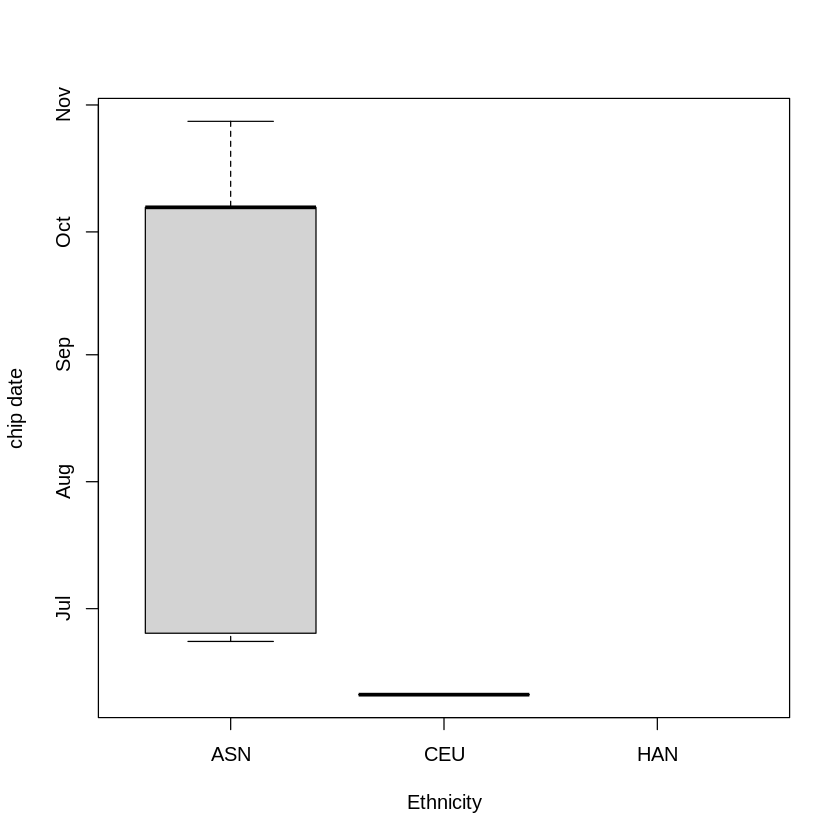

In [ ]:
#boxplot(date~factor(ethnicity), data=sampleInfo, ylab="chip date")
boxplot(es1$date ~ es1$ethnicity, xlab = "Ethnicity", ylab="chip date")

In [ ]:
# How many samples were created on 2005-10-28?
library(dplyr)
filter(sampleInfo, date == "2005-10-28")




Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ethnicity,date,filename,group
<fct>,<date>,<chr>,<dbl>
ASN,2005-10-28,GSM136576.CEL.gz,1
ASN,2005-10-28,GSM136575.CEL.gz,1



 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  868   295   541   509   144   259   240   342   528   124   581   539   239 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9 chrUn  chrX  chrY 
  119   217   466   333   398   530   391   284   331     1   400    21 

chr2 
 539

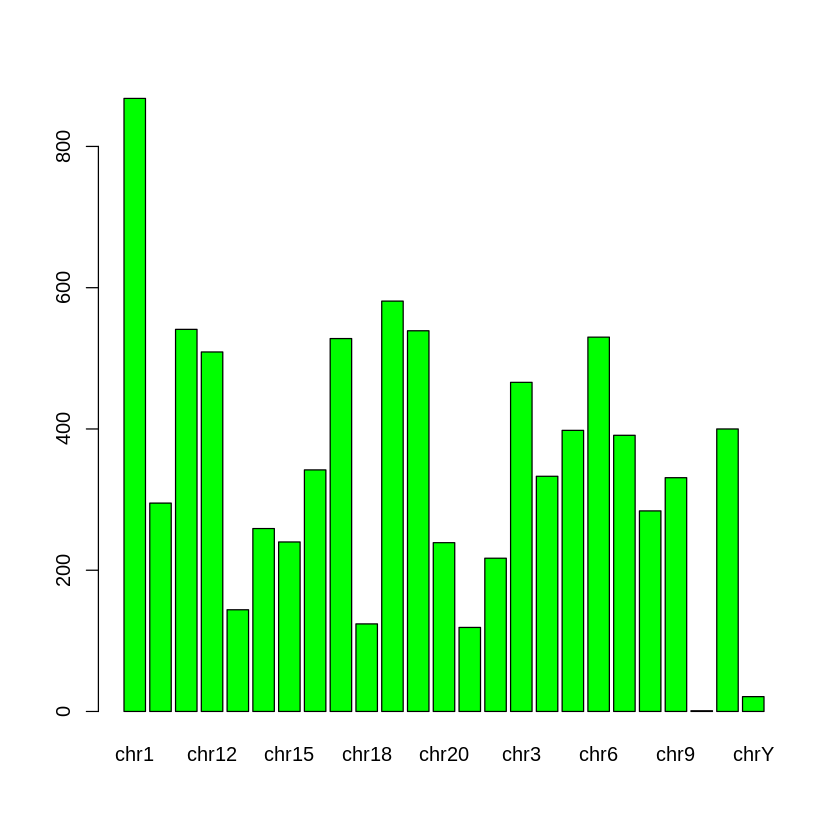

In [ ]:
# How many genes are part of CHR 2 ?
tbl <- table(geneAnnotation$CHR)
tbl
tbl[names(tbl)== "chr2"]

barplot(tbl, col = "green")

In [ ]:
# log expresson of the gene BRCA1
id <- which(geneAnnotation$SYMBOL == "ERH")
geneExpression[id,]
dplyr::filter(geneAnnotation, SYMBOL == "ERH")

GSM136508.CEL.gz GSM136530.CEL.gz GSM136517.CEL.gz GSM136576.CEL.gz 
        9.940097         9.921458         9.714233         9.468335 
GSM136566.CEL.gz GSM136574.CEL.gz GSM136575.CEL.gz GSM136569.CEL.gz 
        9.621515         9.243736         9.750795         9.725971 
GSM136568.CEL.gz GSM136559.CEL.gz GSM136565.CEL.gz GSM136573.CEL.gz 
        9.270589         9.844765         9.901577         9.830478 
GSM136523.CEL.gz GSM136509.CEL.gz GSM136727.CEL.gz GSM136510.CEL.gz 
       10.048694         9.765345        10.068255         9.874379 
GSM136515.CEL.gz GSM136522.CEL.gz GSM136507.CEL.gz GSM136524.CEL.gz 
       10.030143         9.756032         9.501489        10.028925 
GSM136514.CEL.gz GSM136563.CEL.gz GSM136564.CEL.gz GSM136572.CEL.gz 
        9.740998         9.711214         9.751319         9.791915

PROBEID,CHR,CHRLOC,SYMBOL
<chr>,<chr>,<int>,<chr>
200043_at,chr14,-69846840,ERH


Hypothesis Test                        

t-test, errors, alpha and beta         

Type-1 and Type-II                     

t-test and p-values (random variable)

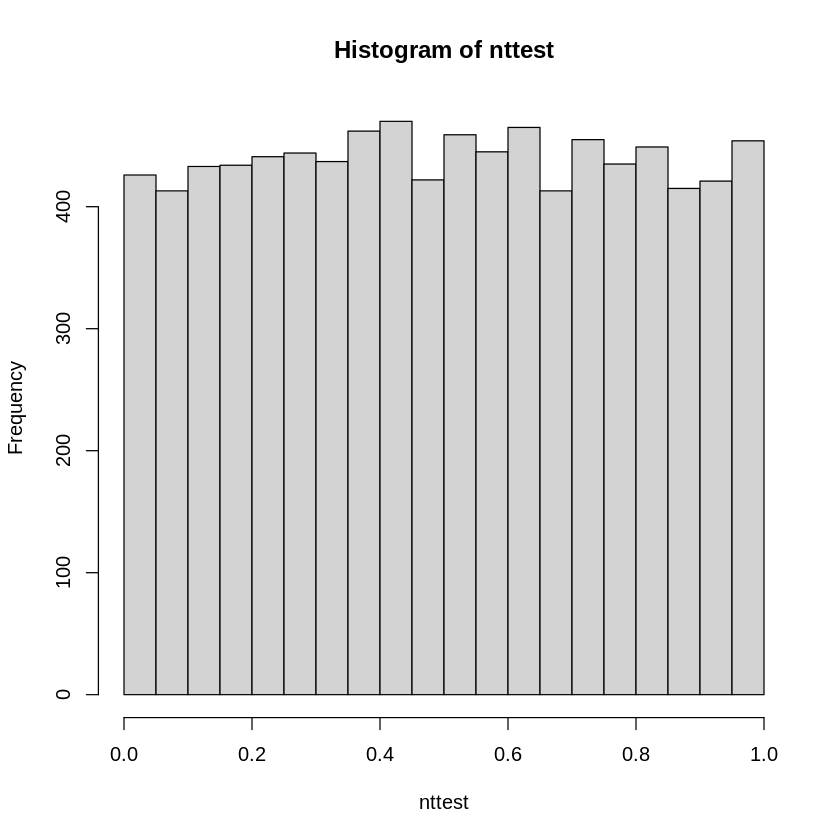

In [ ]:
# t-test and p-values (random variable)

population <- matrix(rnorm(211032), 8793,24)
nttest <- vector(mode = "numeric", nrow(population))
for (i in 1:nrow(population)) {
  nttest[i] <- t.test(population[i,1:12],population[i,13:24])$p.value
}
hist(nttest)

[1] 0.04844763

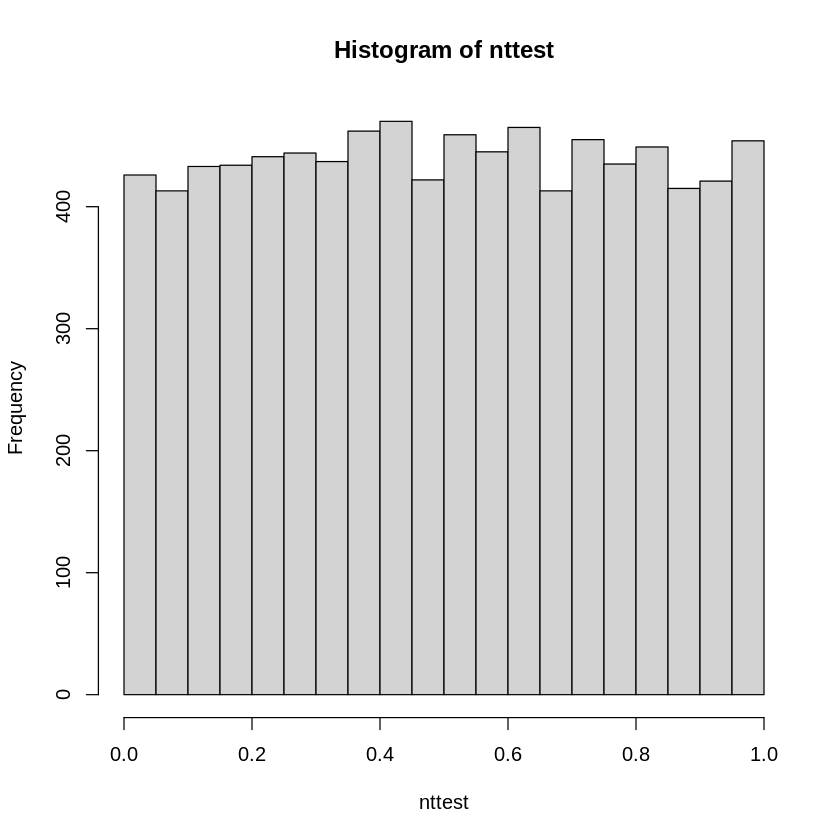

In [ ]:
# How many genes are significant at 0.05 level
sum(nttest < 0.05)/length(nttest)
hist(nttest)

GSM136523.CEL.gz GSM136509.CEL.gz GSM136727.CEL.gz GSM136510.CEL.gz 
        5.212521         5.276950         5.187526         5.032808 
GSM136515.CEL.gz GSM136522.CEL.gz GSM136507.CEL.gz GSM136524.CEL.gz 
        5.423042         5.091719         5.255398         5.220855 
GSM136514.CEL.gz GSM136563.CEL.gz GSM136564.CEL.gz GSM136572.CEL.gz 
        5.188115         5.213479         5.606066         5.172077

GSM136508.CEL.gz GSM136530.CEL.gz GSM136517.CEL.gz GSM136576.CEL.gz 
        5.359877         5.150625         5.220576         5.134047 
GSM136566.CEL.gz GSM136574.CEL.gz GSM136575.CEL.gz GSM136569.CEL.gz 
        5.397551         5.053942         5.369158         5.195610 
GSM136568.CEL.gz GSM136559.CEL.gz GSM136565.CEL.gz GSM136573.CEL.gz 
        5.254607         5.560191         5.237274         5.023152

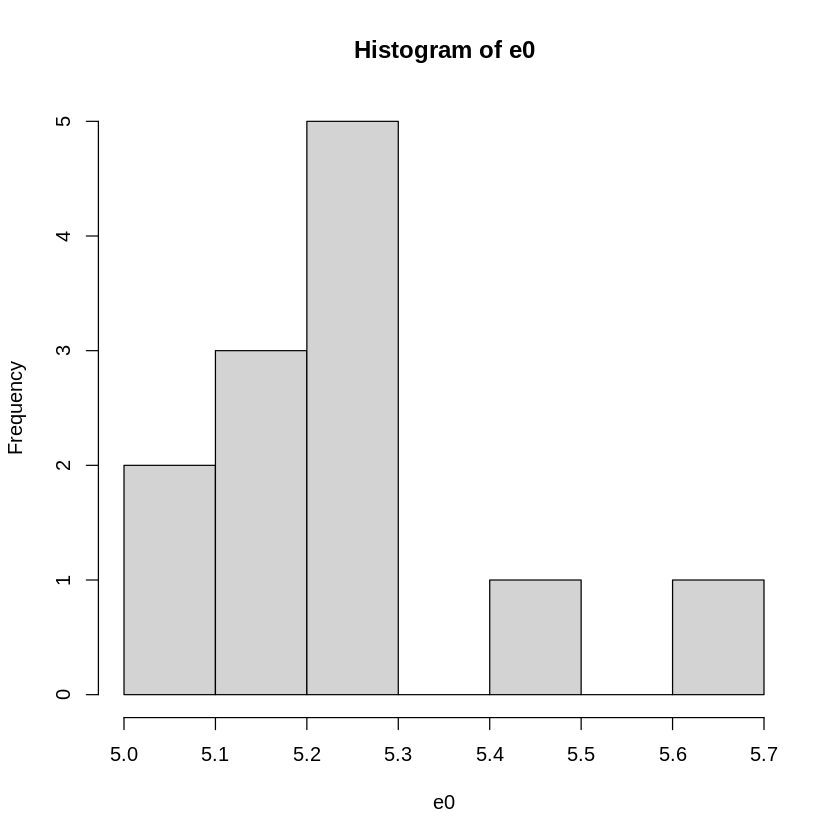


	Welch Two Sample t-test

data:  e0 and e1
t = -0.10224, df = 21.98, p-value = 0.9195
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1349037  0.1222284
sample estimates:
mean of x mean of y 
 5.240046  5.246384 


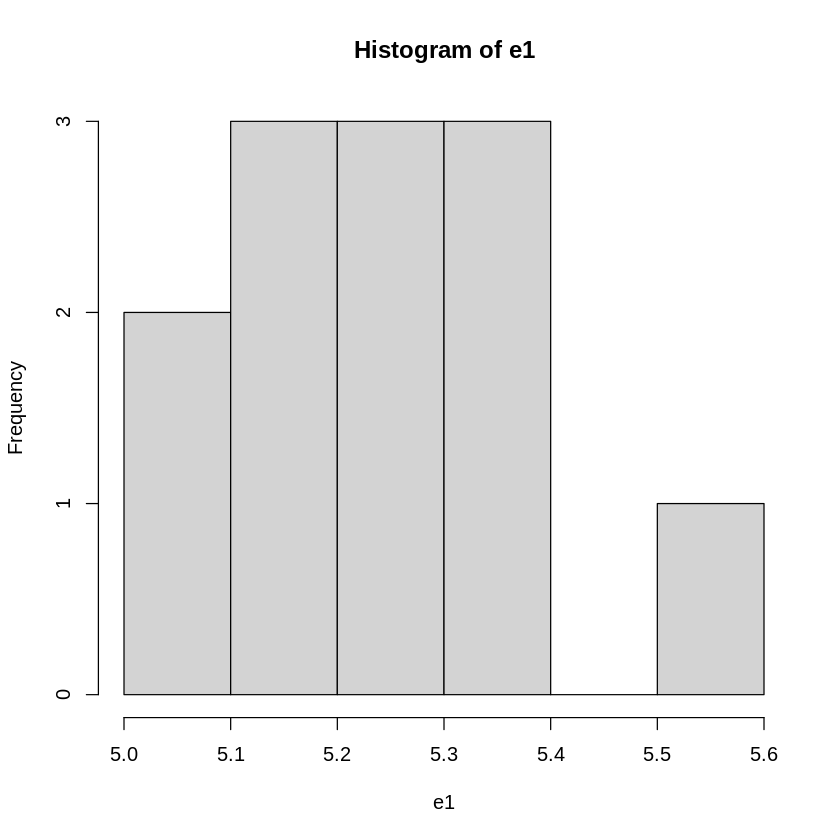

In [ ]:
#### Let us talk about t-test and how to carry out a t-test
e0 <- geneExpression[10,g == 0]
e1 <- geneExpression[10,g == 1]
e0
e1
hist(e0)
hist(e1)
t.test(e0,e1)

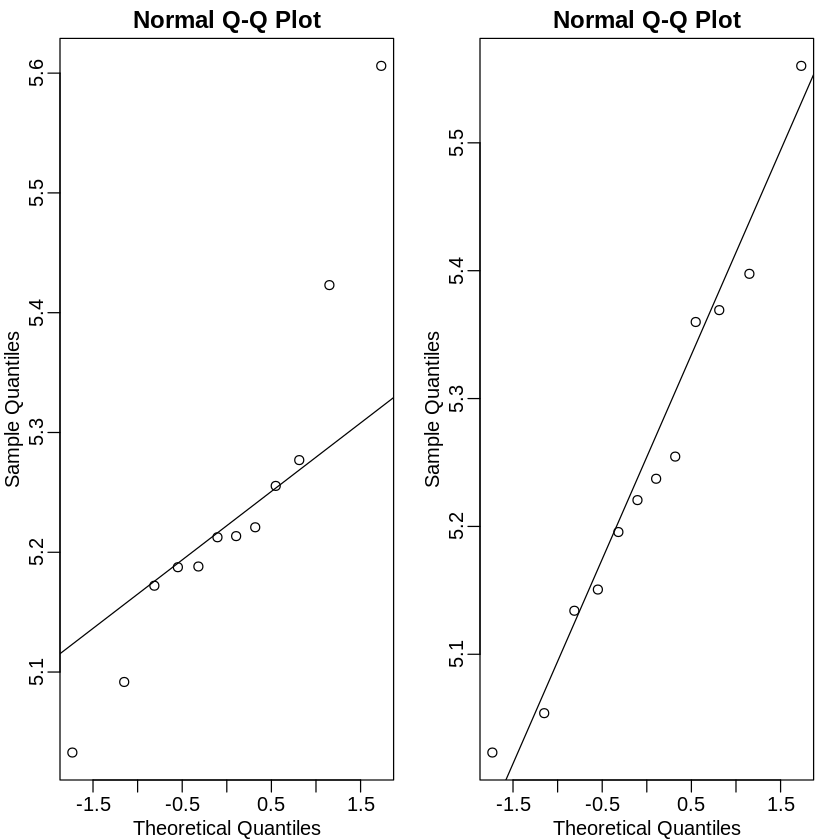

In [ ]:
# let us do a q-q plot
library(rafalib)
mypar(1,2)
qqnorm(e0)
qqline(e0)

qqnorm(e1)
qqline(e1)


GSM136523.CEL.gz GSM136509.CEL.gz GSM136727.CEL.gz GSM136510.CEL.gz 
        4.889563         4.613040         5.082570         5.018405 
GSM136515.CEL.gz GSM136522.CEL.gz GSM136507.CEL.gz GSM136524.CEL.gz 
        4.656821         5.061721         4.861452         5.011388 
GSM136514.CEL.gz GSM136563.CEL.gz GSM136564.CEL.gz GSM136572.CEL.gz 
        5.066587         4.234130         4.217946         4.743191

GSM136508.CEL.gz GSM136530.CEL.gz GSM136517.CEL.gz GSM136576.CEL.gz 
        4.527518         4.805130         5.200930         5.936903 
GSM136566.CEL.gz GSM136574.CEL.gz GSM136575.CEL.gz GSM136569.CEL.gz 
        4.767406         4.715171         5.010320         4.264349 
GSM136568.CEL.gz GSM136559.CEL.gz GSM136565.CEL.gz GSM136573.CEL.gz 
        4.911160         4.720294         4.214054         4.550663

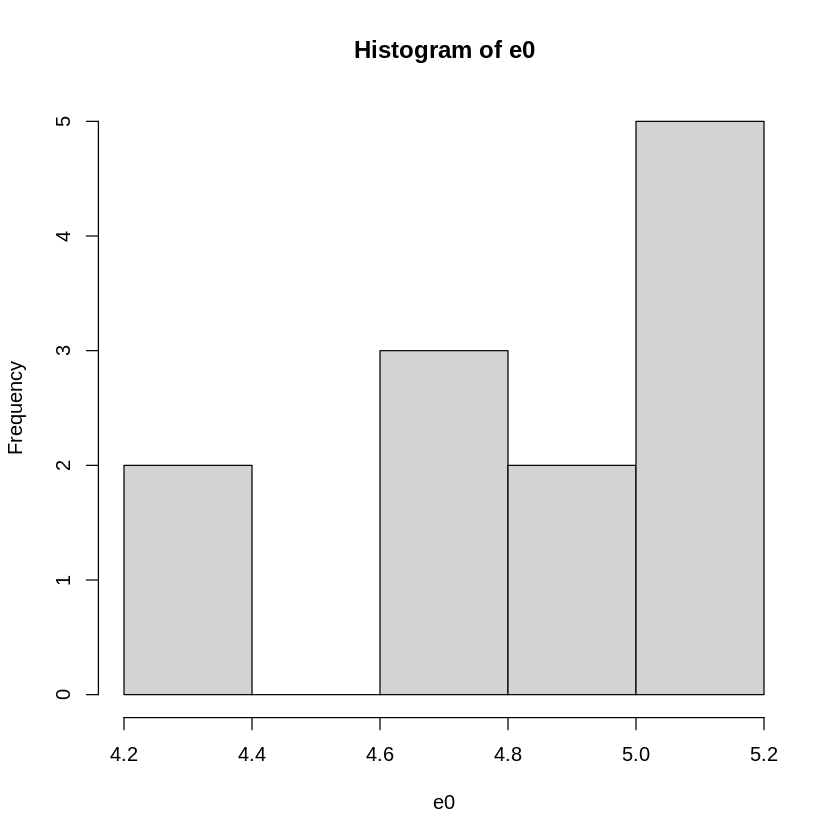


	Welch Two Sample t-test

data:  e0 and e1
t = -0.087654, df = 19.278, p-value = 0.9311
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3460721  0.3182246
sample estimates:
mean of x mean of y 
 4.788068  4.801992 


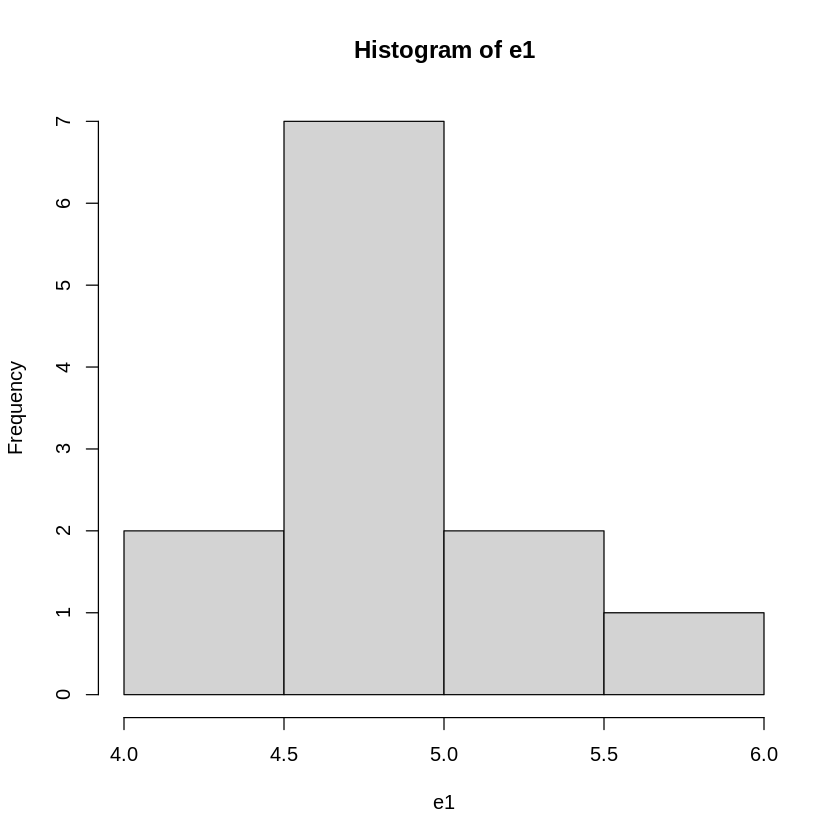

In [ ]:
# random variables

#### Let us talk about t-test and how to carry out a t-test
e0 <- geneExpression[1000,g == 0]
e1 <- geneExpression[1000,g == 1]
e0
e1
hist(e0)
hist(e1)
t.test(e0,e1)

In [ ]:
# thousands of t-test
ttest <- vector(mode = "numeric", nrow(geneExpression))
g <- sampleInfo$group
for (i in 1:nrow(geneExpression)) {
   ttest[i] <- t.test(geneExpression[i,g == 0],geneExpression[i,g == 1])$p.value
}


```
## When we do the t-test?
## We make mistakes
## the

##                                  OUR-CALL     
##                         Called Sig    Called insig   Total
##        Null is True     V            m0-V           m0
## TRUTH   Alt is True     S            m1-S           m1
##        Total True       R            m-R            m

# For any given set, we should be able to identify
# the total TRUE correctly
# Type 1 error: False positive, V (number); alpha = prob = V/m0
# Type-II: error: False negative: S (number); beta = prob = S/m1

# In reality, we only know R and we do not know
# What we know is the significant genes or units are
# much smaller than the non-significant ones

# Note V and S are random numbers

# Before genomics, in most cases, we do only one test
# In genomics, we do many many hundreds of tests
# so, accidently finding a test with < 0.05 is very possible.
# remember in a case where you know it is a null and
# and carry out tests, the p-value distribution is uniform
#

# error rates

# Probability of making at least one type-1 error among
#      the total number of tests

#---------------FWER-----
# FWER Family-wise Error Rate (FWER)
# Probability of making at least one error
#  one or more false discoveries ot Type-1 errors when
# mulforming multiple hypothesis tests
#   FWER = Pr(V >= 1)
#   FWER = 1 - Pr(V = 0 )

# Bonferroni Correction

# Banajmini Hochberg correction
#  FDR = V/R
# two ways to estimate FDR  often called expected FDR
# Benjamini Hochberg is on eof them

# compute the p-values
# sort the p-values smallest to largest
# select the p(i) <=  (i/m) * alpha
# alpha = 0.05 ; m is th eotal number of tests
# i is just the index of p values
# the number of genes that correspond to the
# the index will have FDR of < 0.05 (in this case, alpha)

# Second method to esimate the FDR is BH metho
# BH method (Storey 2002)
# less conservative approach then Benjamini Hochberg

# Let k be the largest i such that
# pi_0 * P(i) <= (i/m) * alpha
# Note pi_0 is the proportion of genes for which H0 is true
# this is an unknown quantity and often estimated
# then reject H_i for i = 1...k
# when pi_0 is one, we fall back to BH method

#EDA in high throughout analysis

# let us compute p-values, adj. pvalues, FDR
```

In [ ]:
BiocManager::install("genefilter")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing package(s) 'genefilter'

also installing the dependencies ‘matrixStats’, ‘MatrixGenerics’


Old packages: 'bit', 'bslib', 'callr', 'curl', 'data.table', 'DBI', 'dbplyr',
  'devtools', 'digest', 'gargle', 'ggplot2', 'gh', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'systemfonts',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun', 'zip',
  'codetools', 'lattice', 'nlme'



In [ ]:
library(genefilter)
library(GSE5859Subset)
data(GSE5859Subset)
g <- factor(sampleInfo$group)
tt_results <- rowttests(geneExpression,g)
p_values <- tt_results$p.value < 0.05
num_p_values <- length(p_values)
num_p_values # 1383 genes
# Apply Benajimi correction to achieve a FWER of 0.05
# let us find out how many genes are now significant
k <- 0.05/num_p_values
sum(tt_results$p.value < k)

[1] 8793

[1] 10

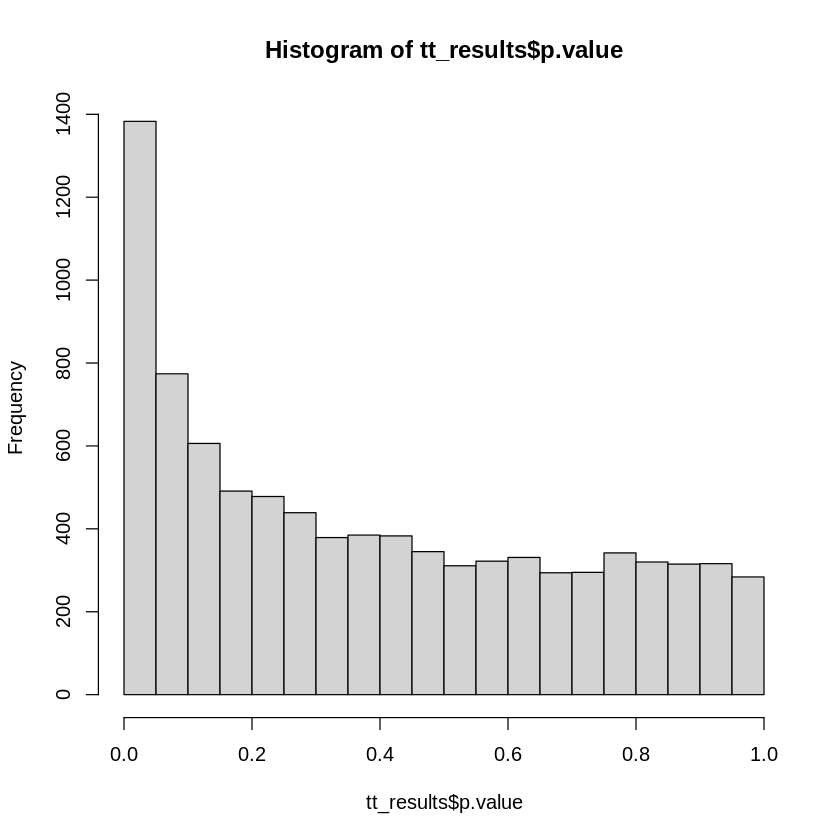

In [ ]:
library(genefilter)
library(GSE5859Subset)
data(GSE5859Subset)
g <- factor(sampleInfo$group)
tt_results <- rowttests(geneExpression,g)
hist(tt_results$p.value)



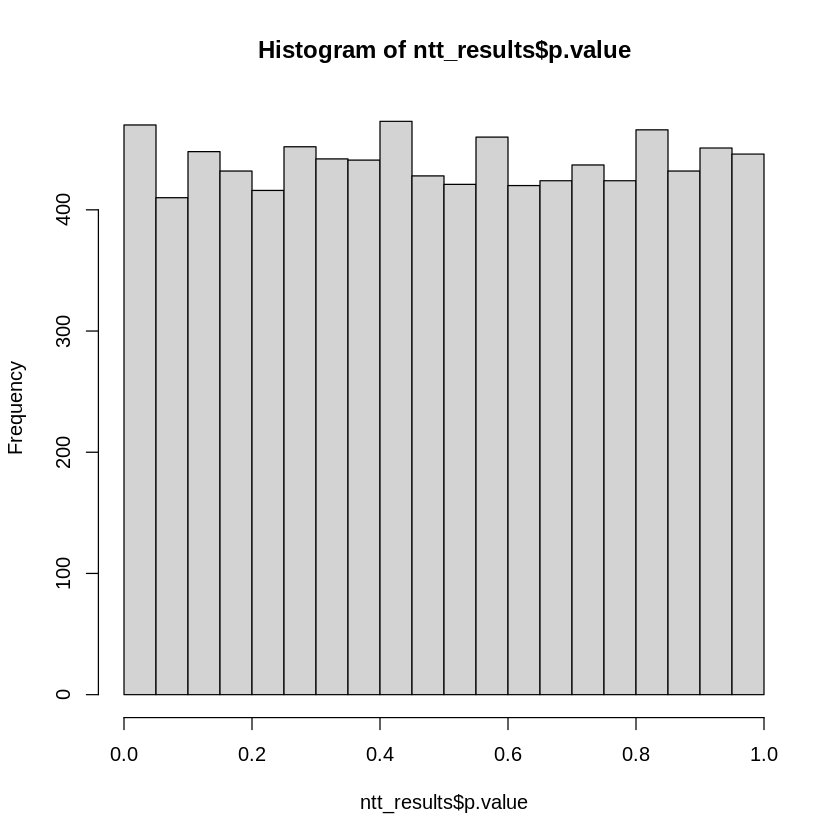

In [ ]:
# let us set up a null

NR <- nrow(geneExpression)
NC <- ncol(geneExpression)
rData <- matrix(rnorm(NR*NC),NR,NC)
ntt_results <- rowttests(rData,g)
hist(ntt_results$p.value)

```
# Reporting only P-values is wrong
# we can have a small effect size and also small p-values
# report both The plot that accomplishes this is called
# Volcano Plot
```

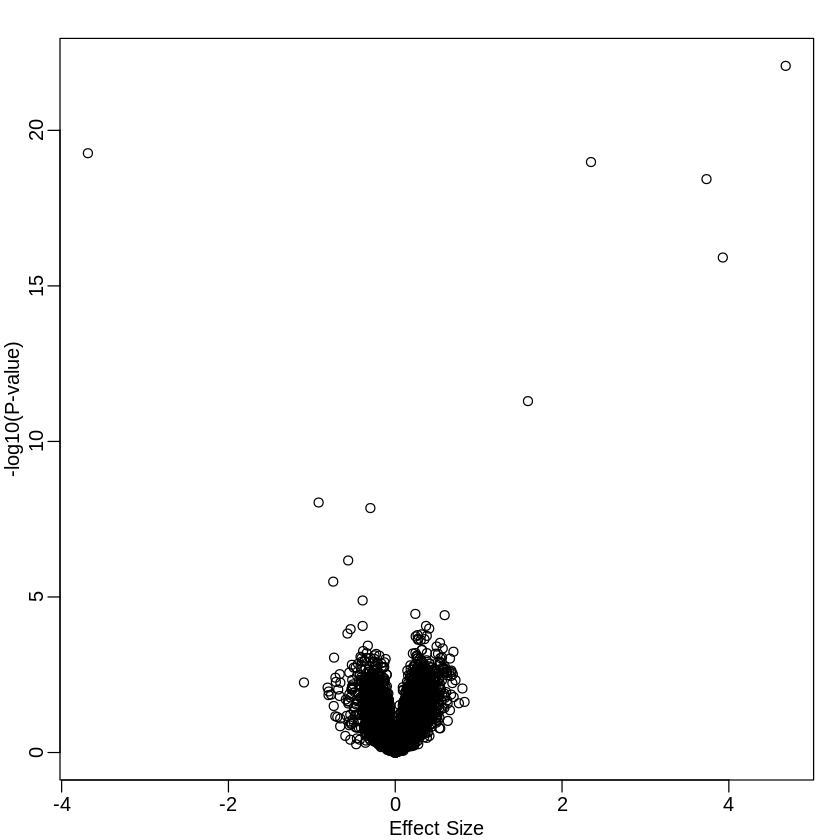

In [ ]:
mypar(1,1)
plot(tt_results$dm, -log10(tt_results$p.value),
       xlab = "Effect Size", ylab = "-log10(P-value)")


```
# EDA 2 tool boxplot can show the gene expression is
# comparable sample distribution in the dataset?
# any abnormality in the data
```

[1] 8793   24

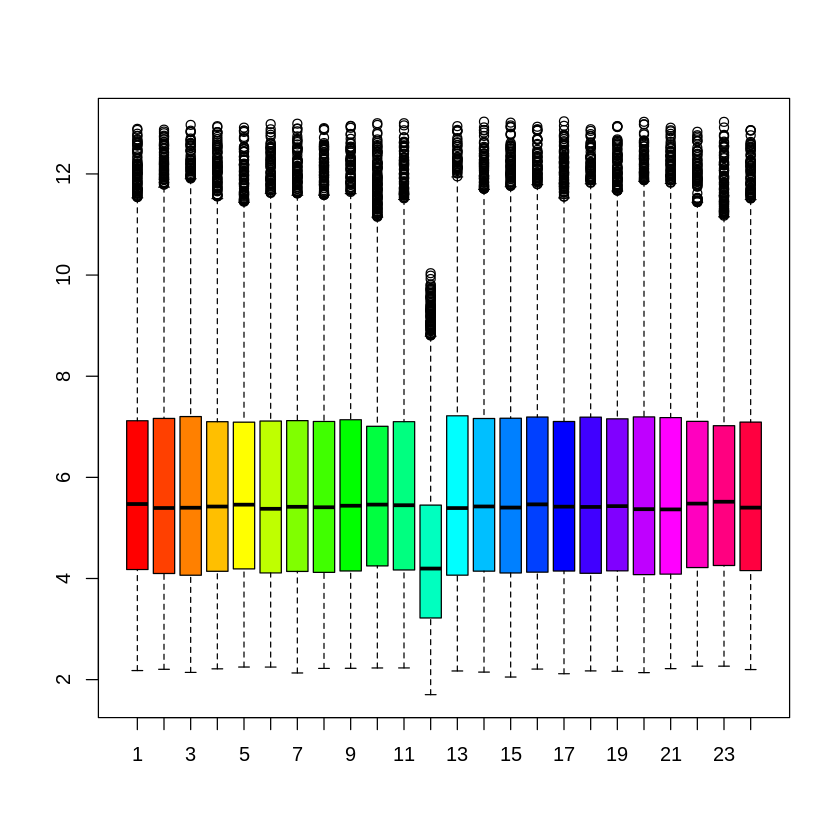

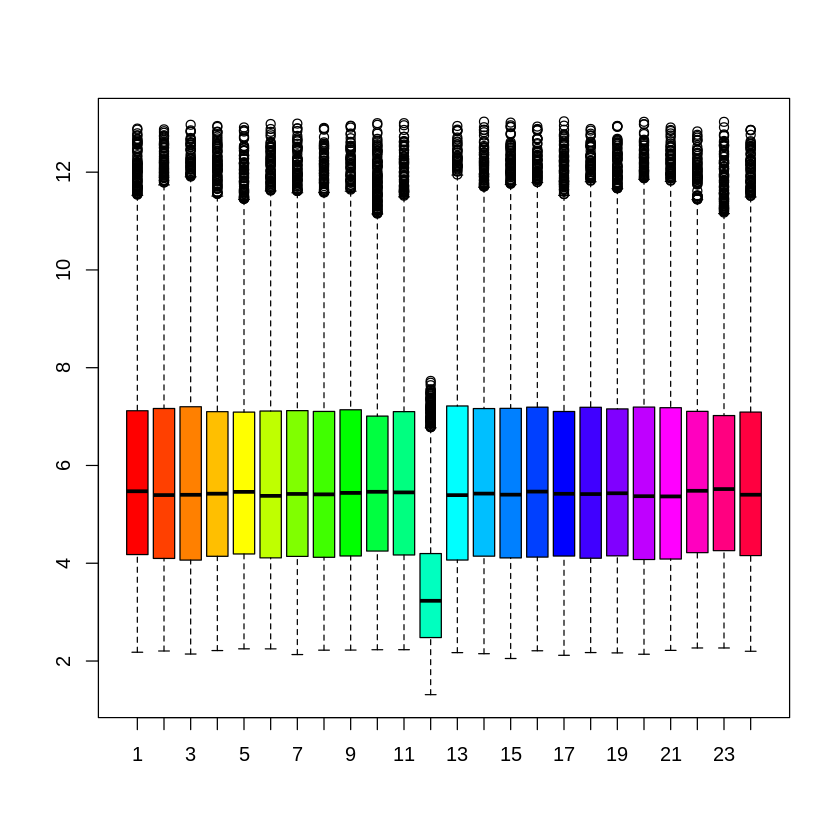

In [ ]:
dim(geneExpression)
e <- geneExpression
# create an error
e[,12] <- e[,12]/log2(exp(0.9))
boxplot(e, names=1:ncol(e),col=rainbow(24))
# go back to the original data
e[,12] <- e[,12]/log2(exp(0.9))
boxplot(e, names=1:ncol(e),col=rainbow(24))

```
## MA Plot in Microarrays

#Bland-Altman plot or in genomics MA plot
# The name MA comes from plots of
# red log intensity minus (M) green intensities
# versus average (A) log intensities

```

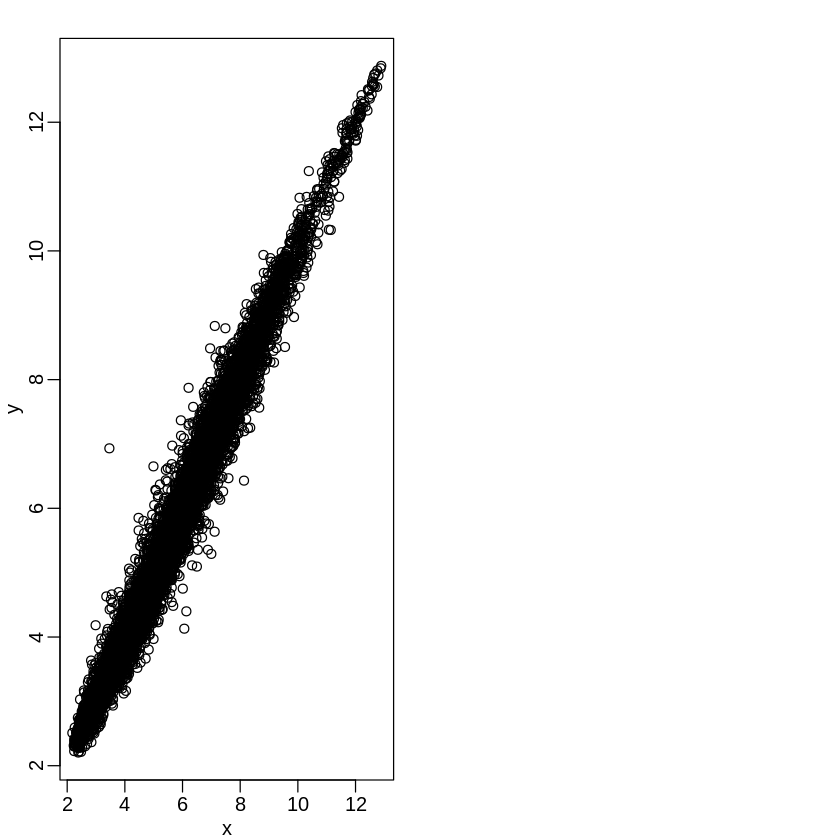

In [ ]:
x <- e[,1]
y <- e[,2]
mypar(1,2)
plot(x,y)

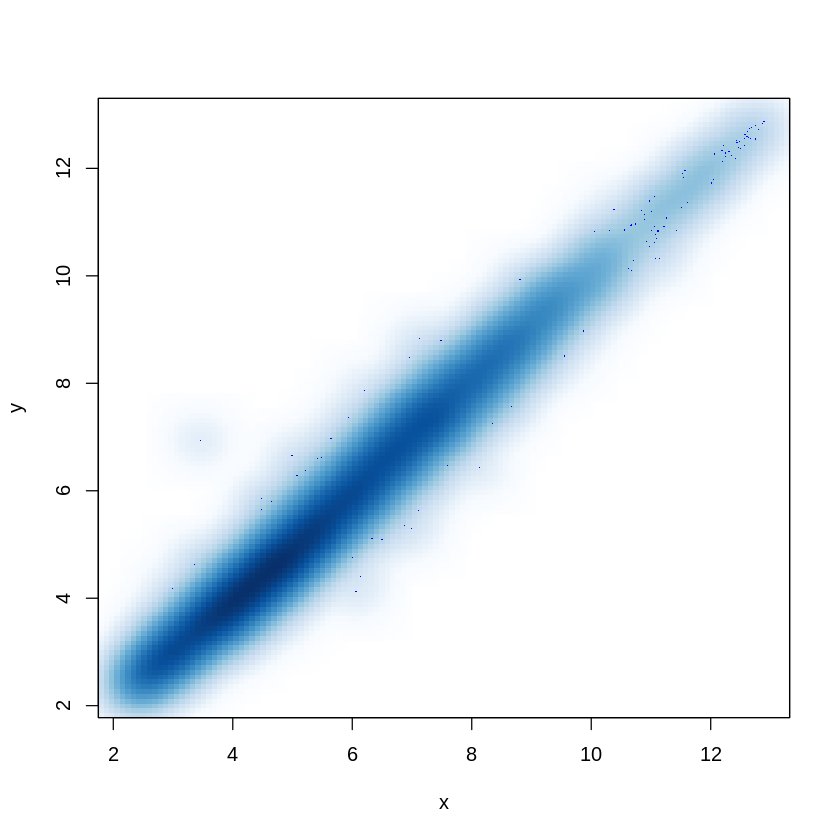

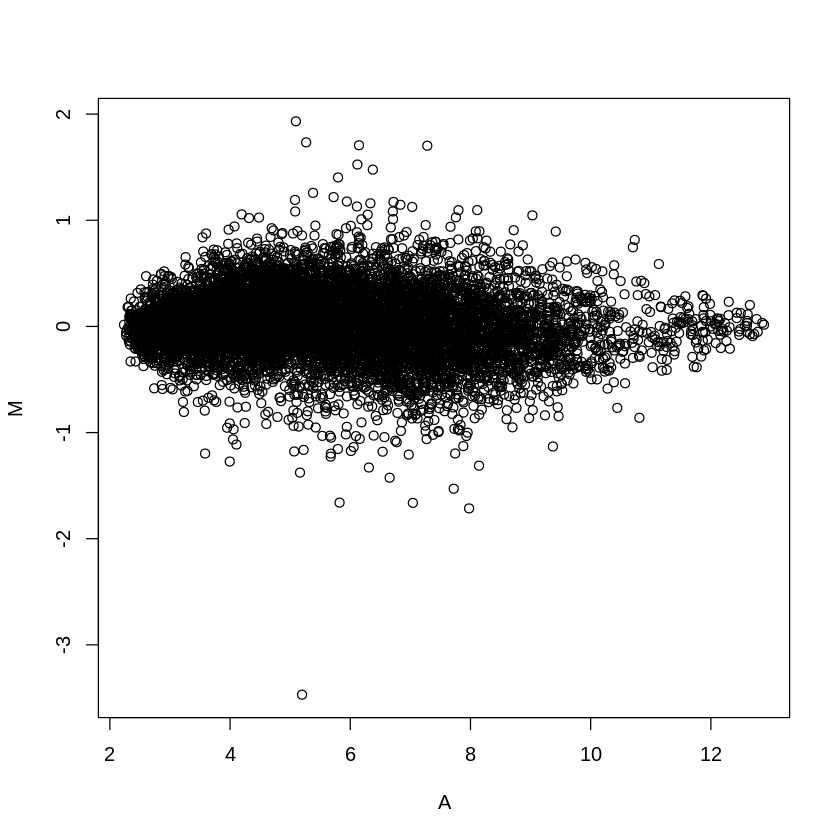

In [ ]:
# most data points are towards the bottom-left.
# let us view them using smoothscatter plot
smoothScatter(x,y, col = "blue")
A <- (x+y)/2; M <- x-y
plot(A,M)

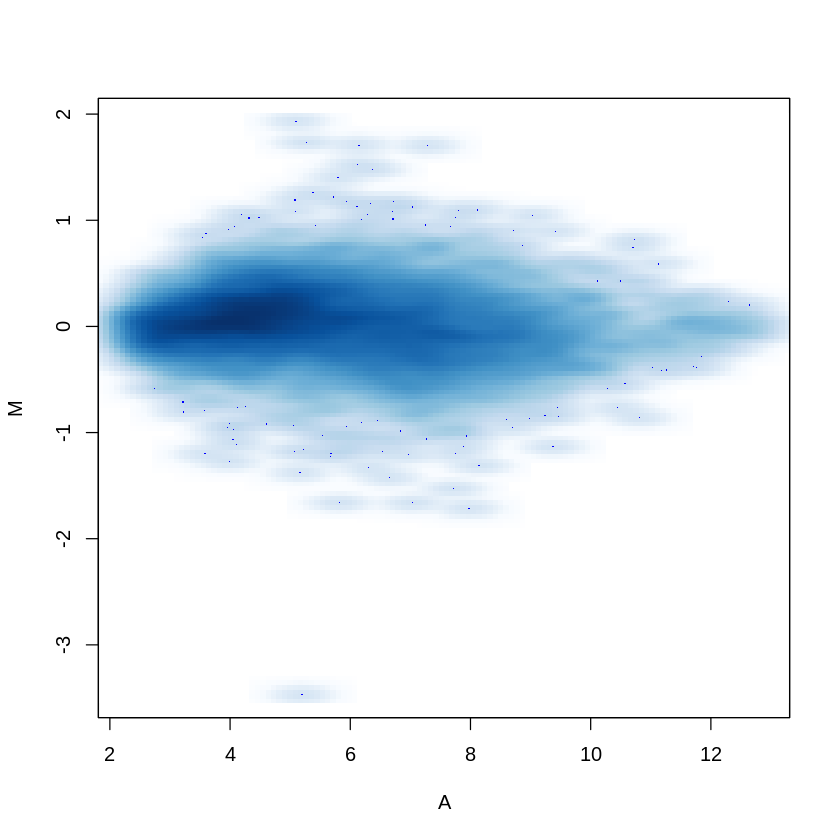

In [ ]:
smoothScatter(A,M, col = "blue")
# most points are twoards the bottom-left

In [ ]:
# 1 minute
BiocManager::install("GEOquery")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing package(s) 'GEOquery'

also installing the dependencies ‘statmod’, ‘R.oo’, ‘R.methodsS3’, ‘limma’, ‘R.utils’


Old packages: 'bit', 'bslib', 'callr', 'curl', 'data.table', 'DBI', 'dbplyr',
  'devtools', 'digest', 'gargle', 'ggplot2', 'gh', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'systemfonts',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun', 'zip',
  'codetools', 'lattice', 'nlme'



In [ ]:
# GSE5859
# Let us load the full GSE5859 set
library(GEOquery)
gse <- getGEO("GSE5859")
e <- exprs(gse[[1]])

Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

Found 1 file(s)

GSE5859_series_matrix.txt.gz



[1] 8793  208

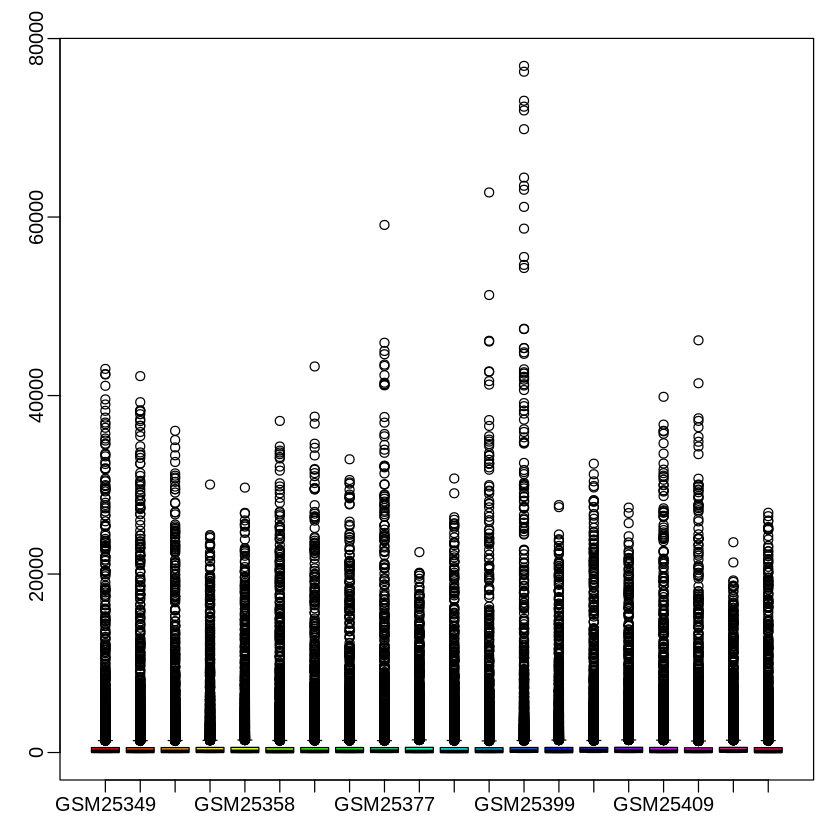

In [ ]:
# This time you get a single expression set constructed and
# loaded for you to work with
#  hgfocus array
dim(e)


mypar(1,1)
boxplot(e[,1:20], col = rainbow(20))

#boxplot(ge, names=1:ncol(e),col=rainbow(208))

